<a href="https://colab.research.google.com/github/Deeppatel0510/Netflix_Movies_and_TV-Show_Unsupervised/blob/main/Netflix_Movies_and_TV_Show_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 -** Gautam Patil
##### **Team Member 2 -** Deep Patel
##### **Team Member 3 -** Sheersh Saxena

# **Project Summary -**

**Unsupervised learning is used in this data science project to analyze a dataset of 10,000+ Netflix films that includes information on the titles, release year, genre, director, cast, and rating. Data cleaning and visualization using tools like scatter plots and histograms are the first steps in the process. Similar titles are grouped using clustering techniques like k-means and hierarchical clustering after preprocessing processes like scaling and dividing into training and testing sets. Through the use of measurements like the elbow technique, optimal cluster numbers are identified. Data structures are easier to visualize when using dimensionality reduction techniques like PCA and t-SNE. Meaningful clusters are found using evaluation criteria like the WCSS and silhouette score. In the end, these data help Netflix make better recommendations and improve the viewing experience.**

# **GitHub Link -**

https://github.com/Deeppatel0510?tab=repositories

# **Problem Statement**


**This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.**

# First view of Dataset

In [54]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import datetime
import unicodedata
import string


from collections import Counter
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from wordcloud import WordCloud , STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity



import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')
from nltk.tokenize import TweetTokenizer

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Mount Google Drive to the Colab environment
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read CSV file into a DataFrame
netflix = pd.read_csv('/content/drive/MyDrive/Project Data/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

# Create a copy of the DataFrame
net_df = netflix.copy()

In [4]:
# Display the first few rows of the DataFrame
net_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
# Get the shape of the DataFrame
net_df.shape

(7787, 12)

In [6]:
# Count the number of duplicated rows in the DataFrame
net_df.duplicated().sum()

0

In [7]:
# Count the number of null values in each column of the DataFrame
net_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

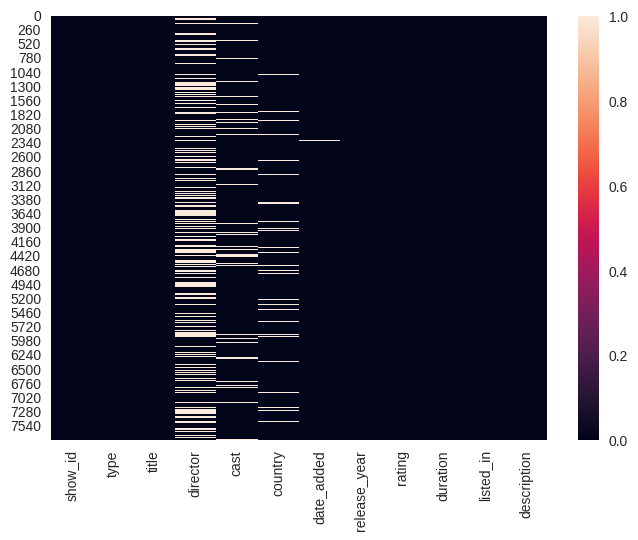

In [8]:
# Create a heatmap to visualize missing values in the DataFrame
sns.heatmap(net_df.isnull(), cbar = True)

### What did you know about your dataset?
show_id : Unique ID for every Movie / Tv Show

type : Identifier - A Movie or TV Show

title : Title of the Movie / Tv Show

director : Director of the Movie

cast : Actors involved in the movie / show

country : Country where the movie / show was produced

date_added : Date it was added on Netflix

release_year : Actual Releaseyear of the movie / show

rating : TV Rating of the movie / show

duration : Total Duration - in minutes or number of seasons

listed_in : Genere

description: The Summary description

# Understand your variable

In [9]:
# Dataset Columns
net_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
# Dataset Describe
net_df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [11]:
# Get information about the DataFrame
net_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [12]:
# Check Unique Values for each variable.
for i in net_df.columns:
  print(f'Unique values in Columns {i} is :  {net_df[i].nunique()}')

Unique values in Columns show_id is :  7787
Unique values in Columns type is :  2
Unique values in Columns title is :  7787
Unique values in Columns director is :  4049
Unique values in Columns cast is :  6831
Unique values in Columns country is :  681
Unique values in Columns date_added is :  1565
Unique values in Columns release_year is :  73
Unique values in Columns rating is :  14
Unique values in Columns duration is :  216
Unique values in Columns listed_in is :  492
Unique values in Columns description is :  7769


# Data Wrangling

In [13]:
# Calculate and display the percentage of missing values for each column in the DataFrame
for i in net_df.columns:
    missing_percentage =(net_df[i].isnull().sum()/net_df.shape[0]*100)
    if missing_percentage > 0:
      message = f" {i} : {missing_percentage:.2f}% missing"
      print(message)


 director : 30.68% missing
 cast : 9.22% missing
 country : 6.51% missing
 date_added : 0.13% missing
 rating : 0.09% missing


In [14]:
# Remove rows with missing values in the 'rating' and 'date_added' columns
net_df.dropna(subset = ['rating', 'date_added'], inplace = True)

#### As 'rating' and 'date_added' takes 0.09% and 0.13% of whole data we can drop those values.

In [15]:
# Fill missing values in the 'country' column with the most frequent value (mode)
net_df['country'].fillna(net_df['country'].mode()[0], inplace = True)

In [16]:
# Replace missing values (NaN) in the 'cast' column with an empty string
net_df['cast'].replace(np.nan, "", inplace = True)

In [17]:
# Replace missing values (NaN) in the 'director' column with an empty string
net_df['director'].replace(np.nan, "", inplace = True)

#### Now lets analyze the columns

#### lets assign the age groups to rating

In [18]:
# Mapping of TV show/movie ratings to corresponding age groups
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

net_df['age_group'] = net_df['rating'].replace(ratings)

#### Extracting month and day from date_added column

In [19]:
# Convert the 'date_added' column to datetime format
net_df['date_added'] = pd.to_datetime(net_df['date_added'])

In [20]:
# Extract and add a new column 'year' based on the year from the 'date_added' column
net_df['year'] = pd.DatetimeIndex(net_df['date_added']).year

In [21]:
# Extract and add a new column 'month' based on the month from the 'date_added' column
net_df['month'] = pd.DatetimeIndex(net_df['date_added']).month

In [22]:
# Extract and add a new column 'dates' based on the day from the 'date_added' column
net_df['dates'] = pd.DatetimeIndex(net_df['date_added']).day

In [23]:
def cast_list(data):
    cast_dict = {}
    temp_list = []
    cast_list = list(data.cast)

    # Split the cast information by commas and extend the temp_list
    for i in cast_list:
        temp_list.extend(i.split(','))

    # Iterate through the temp_list to populate the cast_dict
    for i in temp_list:
        if i not in cast_dict:
            cast_dict[i] = temp_list.count(i)

    # Create a DataFrame from cast_dict, transpose it, reset the index, and sort by count in descending order
    sorted_cast = pd.DataFrame([cast_dict]).T.reset_index().sort_values(by=0, ascending=False)

    # Drop a row
    sorted_cast = sorted_cast.drop(106)

    # Rename the columns for clarity
    sorted_cast.rename(columns={'index': 'cast_name', 0: 'count'}, inplace=True)
    return sorted_cast

# Apply the cast_list function to the net_df DataFrame
casts = cast_list(net_df)

In [24]:
def genre_list(data):
    genre_dict = {}
    temp_list = []
    genre_list = list(data.listed_in)

    # Split the genre information by commas and extend the temp_list
    for i in genre_list:
        temp_list.extend(i.split(','))

    # Remove leading and trailing whitespaces from genre names
    remove_whitespace = [i.strip() for i in temp_list]

    # Iterate through the cleaned list to populate the genre_dict
    for i in remove_whitespace:
        if i not in genre_dict:
            genre_dict[i] = remove_whitespace.count(i)

    # Create a DataFrame from genre_dict, transpose it, reset the index, and sort by count in descending order
    sorted_genre = pd.DataFrame([genre_dict]).T.reset_index().sort_values(by=0, ascending=False)

    # Rename the columns for clarity
    sorted_genre.rename(columns={'index': 'genre_name', 0: 'count'}, inplace=True)
    return sorted_genre

# Apply the genre_list function to the net_df DataFrame
genres = genre_list(net_df)


In [25]:
# Filter the DataFrame to include only 'Movie' type entries
movie_df = net_df[net_df['type'] == 'Movie']

# Define a function to extract and count genres from movie data
def movie_genre_list(data):
    movie_dict = {}
    temp_list = []
    movie_list = list(data.listed_in)

    # Split the genre information by commas and extend the temp_list
    for i in movie_list:
        temp_list.extend(i.split(','))

    # Remove leading and trailing whitespaces from genre names
    remove_whitespace = [i.strip() for i in temp_list]

    # Iterate through the cleaned list to populate the movie_dict
    for i in remove_whitespace:
        if i not in movie_dict:
            movie_dict[i] = remove_whitespace.count(i)

    # Create a DataFrame from movie_dict, transpose it, reset the index, and sort by count in descending order
    movie_cast = pd.DataFrame([movie_dict]).T.reset_index().sort_values(by=0, ascending=False)

    # Rename the columns for clarity (genre and count)
    movie_cast.rename(columns={'index': 'genre', 0: 'count'}, inplace=True)
    return movie_cast

# Apply the movie_genre_list function to the movie_df DataFrame
movie_genres = movie_genre_list(movie_df)

In [26]:
# Filter the DataFrame to include only 'TV Show' type entries
tv_df = net_df[net_df['type'] == 'TV Show']

# Define a function to extract and count genres from TV show data
def tv_genre_list(data):
    tv_dict = {}
    temp_list = []
    tv_list = list(data.listed_in)

    # Split the genre information by commas and extend the temp_list
    for i in tv_list:
        temp_list.extend(i.split(','))

    # Remove leading and trailing whitespaces from genre names
    remove_whitespace = [i.strip() for i in temp_list]

    # Iterate through the cleaned list to populate the tv_dict
    for i in remove_whitespace:
        if i not in tv_dict:
            tv_dict[i] = remove_whitespace.count(i)

    # Create a DataFrame from tv_dict, transpose it, reset the index, and sort by count in descending order
    tv_cast = pd.DataFrame([tv_dict]).T.reset_index().sort_values(by=0, ascending=False)

    # Rename the columns for clarity (genre and count)
    tv_cast.rename(columns={'index': 'genre', 0: 'count'}, inplace=True)
    return tv_cast

# Apply the tv_genre_list function to the tv_df DataFrame
tv_genres = tv_genre_list(tv_df)


In [27]:
# Convert the 'director' column to strings to ensure consistent data type
net_df['director'] = net_df['director'].astype(str)

# Define a function to extract and count directors from a given dataset
def director_list(data):
    director_dict = {}
    temp_list = []
    director_list = list(data.director)

    # Split the director information by commas and extend the temp_list
    for i in director_list:
        temp_list.extend(i.split(','))

    # Remove leading and trailing whitespaces from director names
    remove_whitespace = [i.strip() for i in temp_list]

    # Iterate through the cleaned list to populate the director_dict
    for i in remove_whitespace:
        if i not in director_dict:
            director_dict[i] = remove_whitespace.count(i)

    # Create a DataFrame from director_dict, transpose it, reset the index, and sort by count in descending order
    sorted_directors = pd.DataFrame([director_dict]).T.reset_index().sort_values(by=0, ascending=False)

    # Drop a row (e.g., drop row 106)
    sorted_directors = sorted_directors.drop(106)

    # Rename the columns for clarity (director and count)
    sorted_directors.rename(columns={'index': 'director', 0: 'count'}, inplace=True)
    return sorted_directors

# Apply the director_list function to the net_df DataFrame, drop the first row, and select the top 20 directors
directors = director_list(net_df).drop(0).head(20)

# Print the sum of counts for the top 20 directors and the DataFrame itself
print(directors['count'].sum())
print(directors)


221
                 director  count
298             Jan Suter     21
297           Raúl Campos     19
426          Marcus Raboy     16
253             Jay Karas     15
186   Cathy Garcia-Molina     13
313       Martin Scorsese     12
307       Youssef Chahine     12
779           Jay Chapman     12
888      Steven Spielberg     10
696        Anurag Kashyap      9
669       Shannon Hartman      9
904          David Dhawan      9
228           Umesh Mehra      8
1302       Yılmaz Erdoğan      8
631           Ryan Polito      8
928           Lance Bangs      8
1198    Quentin Tarantino      8
95         Justin G. Dyck      8
625           Hakan Algül      8
715            Johnnie To      8


In [28]:
# Filter the DataFrame to include only 'TV Show' type entries
tv_shows = net_df[net_df['type'] == "TV Show"]

# Filter the DataFrame to include only 'Movie' type entries
movies_ = net_df[net_df['type'] == "Movie"]


In [29]:
# Remove 'minutes' from movie durations and convert to integers
movies_['duration'] = movies_['duration'].str.replace(' min', '').astype(int)

# Remove 'Seasons' and 'Season' from TV show durations and convert to integers
tv_shows['duration'] = tv_shows['duration'].str.replace(' Seasons', '')
tv_shows['duration'] = tv_shows['duration'].str.replace(' Season', '').astype(int)

# EDA

## 1 - Visualizing Content Type Distribution

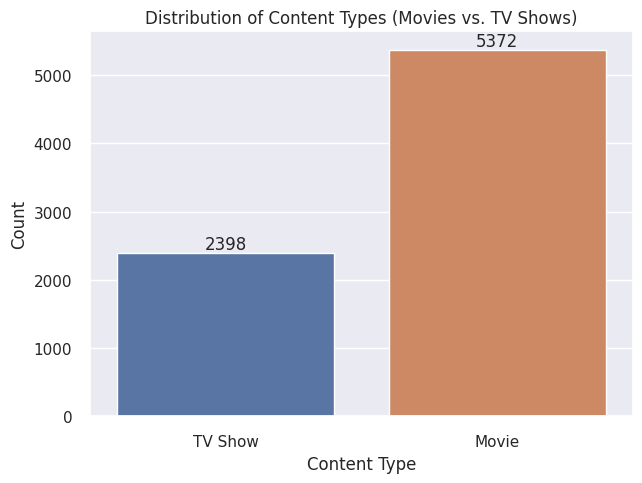

In [30]:
# Create a count plot to visualize the distribution of content types
sns.set(rc={'figure.figsize': (7, 5)})
ax = sns.countplot(x='type', data=net_df)

# Add labels to the bars in the count plot
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='edge')

# Add a title and labels to the axes
plt.title('Distribution of Content Types (Movies vs. TV Shows)')
plt.xlabel('Content Type')
plt.ylabel('Count')

plt.show()


-->  According to eda, people prefer watching movies than TV shows.

-->  We can see that TV shows are less popular than movies, thus Netflix has to offer more TV show material in order to keep its audience.

## 2 - Visualization of Netflix Originals: TV Shows vs. Movies

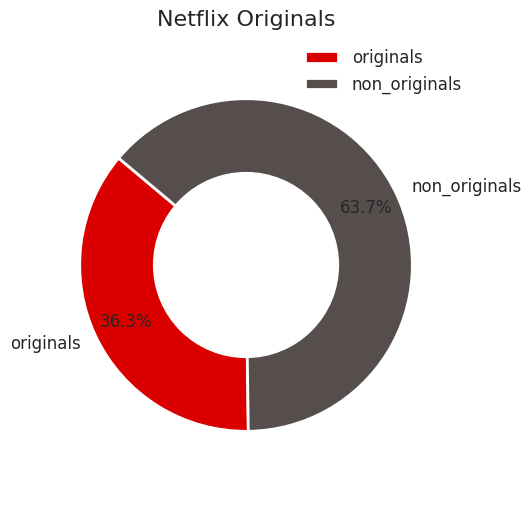

In [31]:
# Calculate the counts
originals = net_df[net_df['release_year'] == net_df['year']].shape[0]
non_originals = net_df[net_df['release_year'] != net_df['year']].shape[0]

# Create a pie chart with a reduced outer circle
plt.figure(figsize=(6, 6))  # Reduce the figure size for a smaller outer circle
plt.pie([originals, non_originals], labels=['originals', 'non_originals'], colors=['#db0000', '#564d4d'], autopct='%1.1f%%', startangle=140,
        wedgeprops={'edgecolor': 'white', 'linewidth': 2}, pctdistance=0.8, textprops={'fontsize': 12},
        radius=0.9)  # Adjust the radius (0.7 for a smaller outer circle)

# Draw a circle in the center to make it a donut chart
center_circle = plt.Circle((0, 0), 0.5, fc='white')  # Adjust the radius (0.5 for a smaller hole)
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Netflix Originals', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.show()


--> There are 36.3% of Movies and TV shows which are exclusive Netflix Originals

## 3 - To see the distribution of works among the best directors


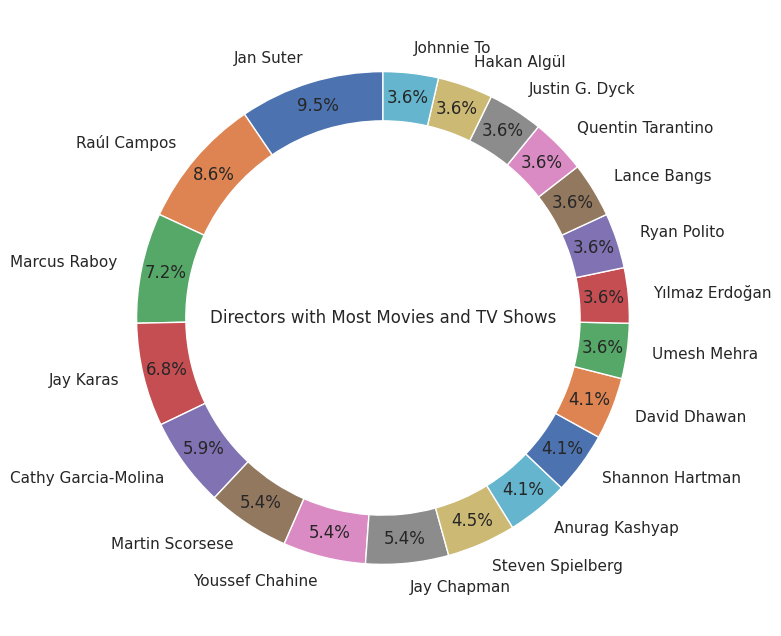

In [32]:
# The 'plt.pie' function generates the pie chart with various customization options.
plt.figure(figsize=(8, 8))

plt.pie(directors['count'], labels=directors['director'], autopct='%1.1f%%', startangle=90,
        wedgeprops=dict(width=0.2), pctdistance = 0.9)

# Adding the title inside the pie chart
plt.gcf().gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.text(0, 0, 'Directors with Most Movies and TV Shows', ha='center', va='center', fontsize=12)
plt.show()

--> The best three directors are, in EDA's opinion, Jan Suter, Raul Campos, and Marcus Raboy.

--> Movies and TV series will make more money if they are made by top directors because of their fan bases.

## 4 - Visualizing the Top 10 Nations with the Most Movies and TV Shows

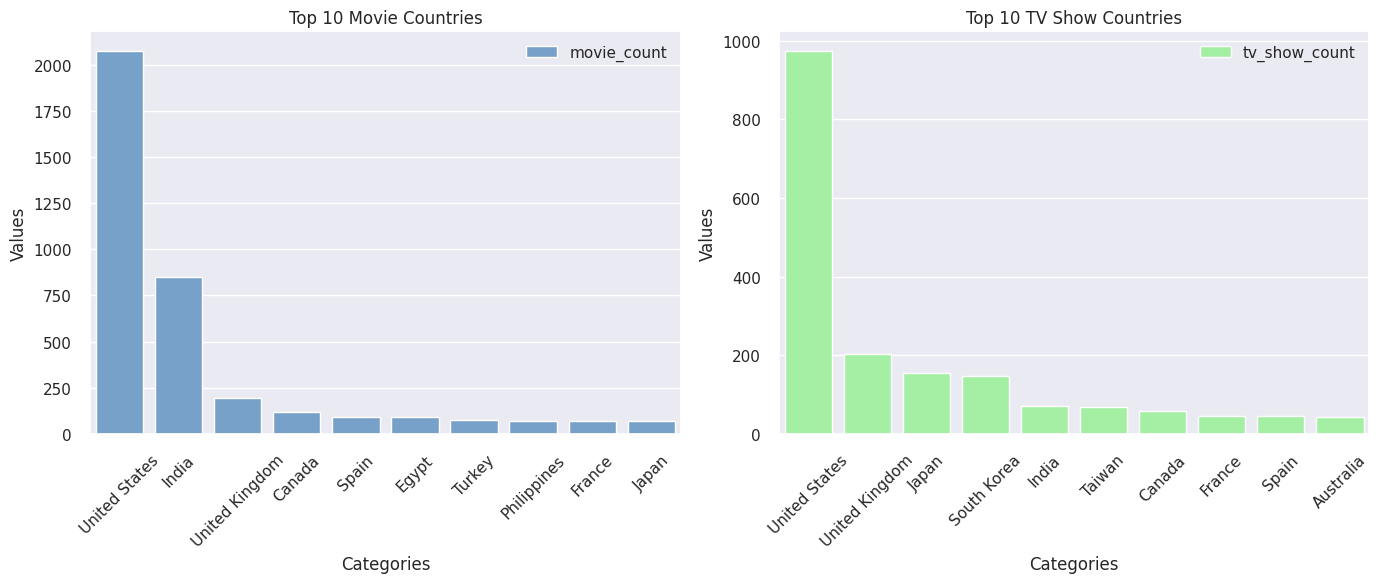

In [33]:
# Extract the top 10 countries with the most movies and TV shows
top10_movie_countries = movie_df['country'].value_counts().reset_index().rename(columns={'index': 'country', 'country': 'count'}).head(10)
top10_tvshow_countries = tv_df['country'].value_counts().reset_index().rename(columns={'index': 'country', 'country': 'count'}).head(10)

# Fill NaN values
top10_movie_countries['count'].fillna(0, inplace=True)
top10_tvshow_countries['count'].fillna(0, inplace=True)

# Create subplots (1x2 grid)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the top 10 movie countries
order_movie = top10_movie_countries['country'].tolist()
sns.barplot(x='country', y='count', data=top10_movie_countries, label='movie_count', color='#6BA1D6', order=order_movie, ax=axes[0])
axes[0].set_title('Top 10 Movie Countries')

# Plot the top 10 TV show countries
order_tvshow = top10_tvshow_countries['country'].tolist()
sns.barplot(x='country', y='count', data=top10_tvshow_countries, label='tv_show_count', color='#98FB98', order=order_tvshow, ax=axes[1])
axes[1].set_title('Top 10 TV Show Countries')

# Add labels and legend
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_xlabel('Categories', fontsize=12)
    ax.set_ylabel('Values', fontsize=12)
    ax.legend()

# Adjust the layout
plt.tight_layout()
plt.show()


--> As compared to other countries, the United States has the most Netflix material, followed by India who has more movies content.

--> The United Kingdom outperforms India in terms of television shows because it has less movie material and more TV shows.

--> We can see that Netflix offers very little stuff for nations other than the United States, thus in order to boost its market worth, Netflix should release more content for other nations.


## 5 - Distribution of Movies and TV Programs by Year of Release

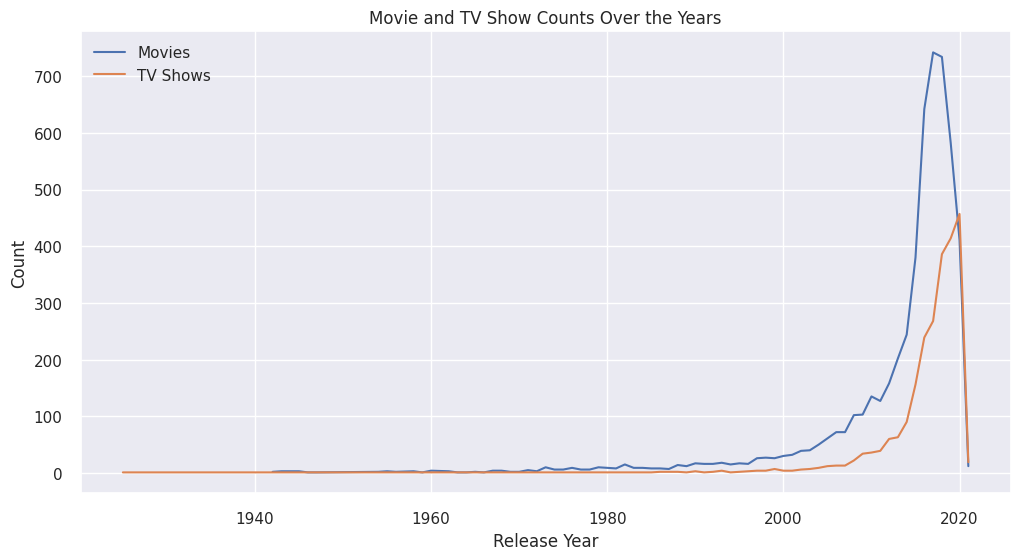

In [34]:
# Count the number of movies and TV shows released each year
movie_counts = net_df[net_df['type'] == 'Movie'].groupby('release_year')['show_id'].count()
tv_show_counts = net_df[net_df['type'] == 'TV Show'].groupby('release_year')['show_id'].count()

# Visualize movie and TV show counts over the years
plt.figure(figsize=(12, 6))
plt.plot(movie_counts.index, movie_counts.values, label='Movies')
plt.plot(tv_show_counts.index, tv_show_counts.values, label='TV Shows')
plt.title('Movie and TV Show Counts Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


--> We can observe that the amount of material released on Netflix increased steadily up until 2019, when it began to decline and had a sharp decline in 2021 as a result of covid.


## 6 - Distribution of Movies and TV Programs by Genre and Age

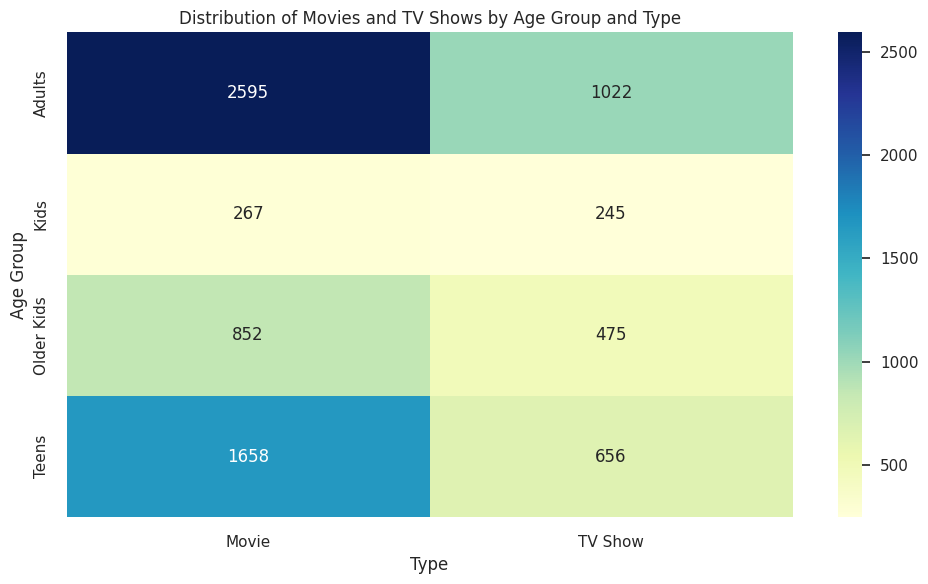

In [35]:
# Calculate a pivot table for the heatmap
pivot_table = net_df.pivot_table(index='age_group', columns='type', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 6))

# Create a heatmap
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')

# Add labels and title
plt.xlabel('Type')
plt.ylabel('Age Group')
plt.title('Distribution of Movies and TV Shows by Age Group and Type')

# Display the plot
plt.tight_layout()
plt.show()

--> EDA leads us to the conclusion that adults are the target audience for the majority of films and TV shows, with teenagers coming in second.

## 7 - Average Duration of Movies and Tv shows according to age group

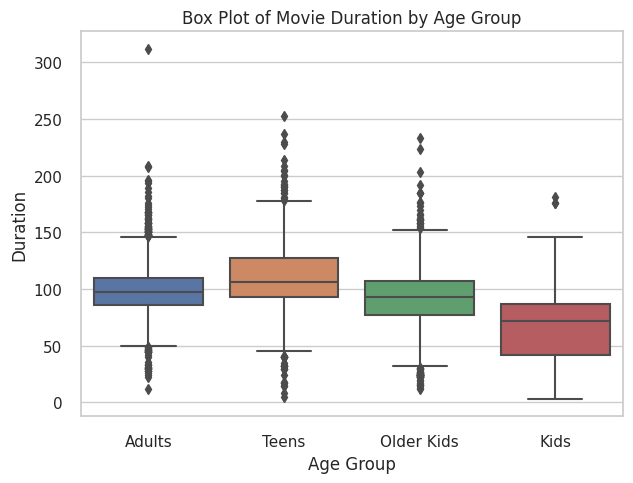

In [36]:
# Set the style of the plot to whitegrid for a cleaner look
sns.set(style="whitegrid")

# Specify the data for the box plot
sns.boxplot(x=movies_['age_group'], y=movies_['duration'])

# Set labels for the axes and the title
plt.xlabel("Age Group")
plt.ylabel("Duration")
plt.title("Box Plot of Movie Duration by Age Group")

# Show the plot
plt.show()

--> According to the graph, across all age groups, teens had the longest average movie runtime, followed by adults and older children.

## 8 - Top 10 Actors and Actresses in Movies and TV Shows

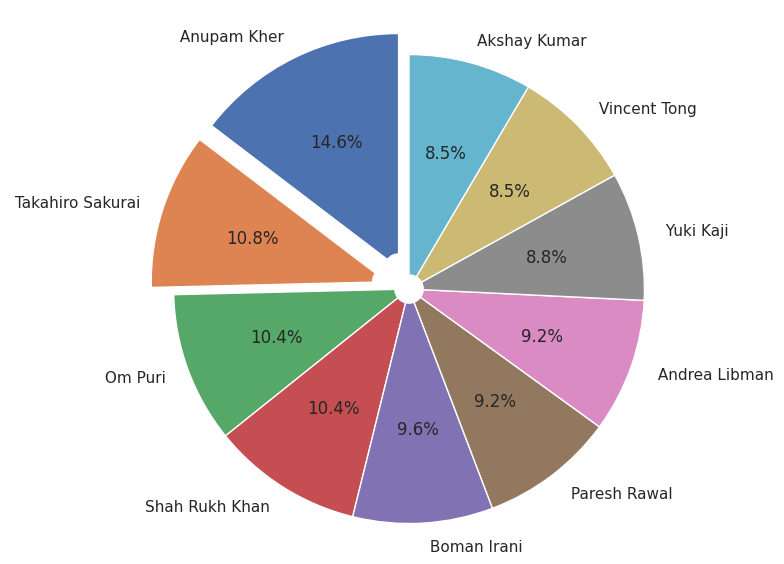

In [37]:
# Create a pie chart to visualize the distribution of top 10 cast members
plt.figure(figsize = (7,7))
plt.pie(casts['count'].head(10), labels = casts['cast_name'].head(10), autopct = '%.1f%%', startangle = 90, wedgeprops = dict(width=(0.94)),
        explode = [0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0])
plt.axis('equal')
plt.show()

--> We can see that Anupam Kher, Takahiro Sakurai, Om Puri, and Shah Rukh Khan are the top four actors on Netflix for Movies and TV episodes.

## 9 - Movie durations are estimated using kernel density

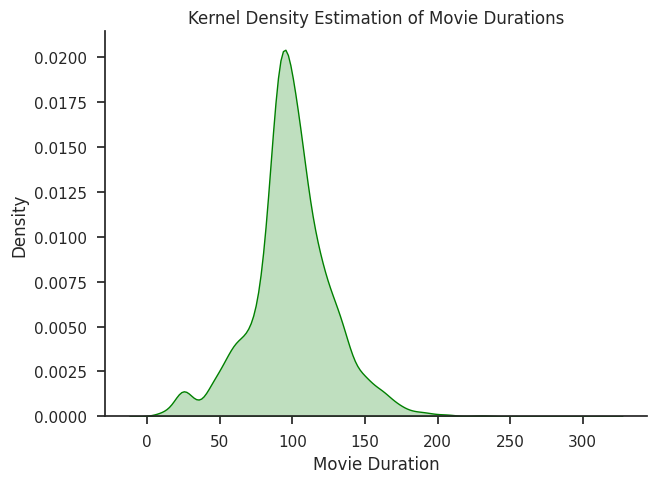

In [38]:
# Create a kernel density plot to visualize the distribution of movie durations
sns.set(style = 'ticks')
sns.kdeplot(data = movies_['duration'], fill = True, color = 'green')

# Adding labels and title
plt.xlabel('Movie Duration')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Movie Durations')

# Removing the top and right spines
sns.despine()
plt.show()

--> The usual duration of a movie is between 90 and 100 minutes, as can be seen.


## 10 - Duration of TV Programs

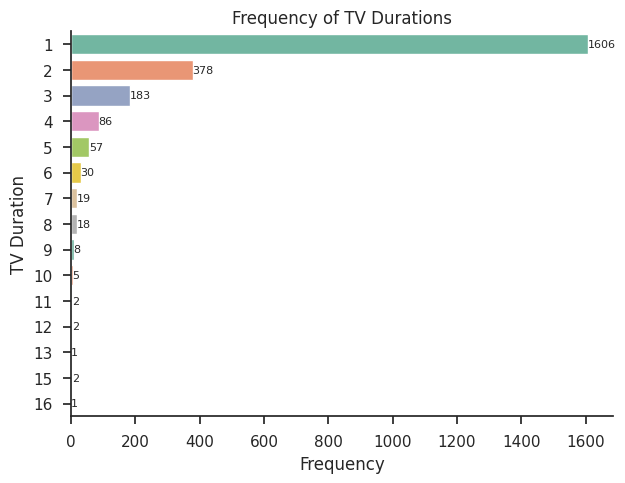

In [39]:
# Create a count plot to visualize the frequency of TV show durations
ax = sns.countplot(y = tv_shows['duration'], palette='Set2')

# Adding labels and title
plt.xlabel('Frequency')
plt.ylabel('TV Duration')
plt.title('Frequency of TV Durations')

ax.bar_label(ax.containers[0], fontsize=8, label_type='edge')

# Removing the right and top spines
sns.despine()
plt.show()

--> The TV shows in the dataset have up to 16 seasons, although most have a single season.

-->

--> Few television programs have more than 8 seasons.

## 11 - The 10 Best Movie Genres

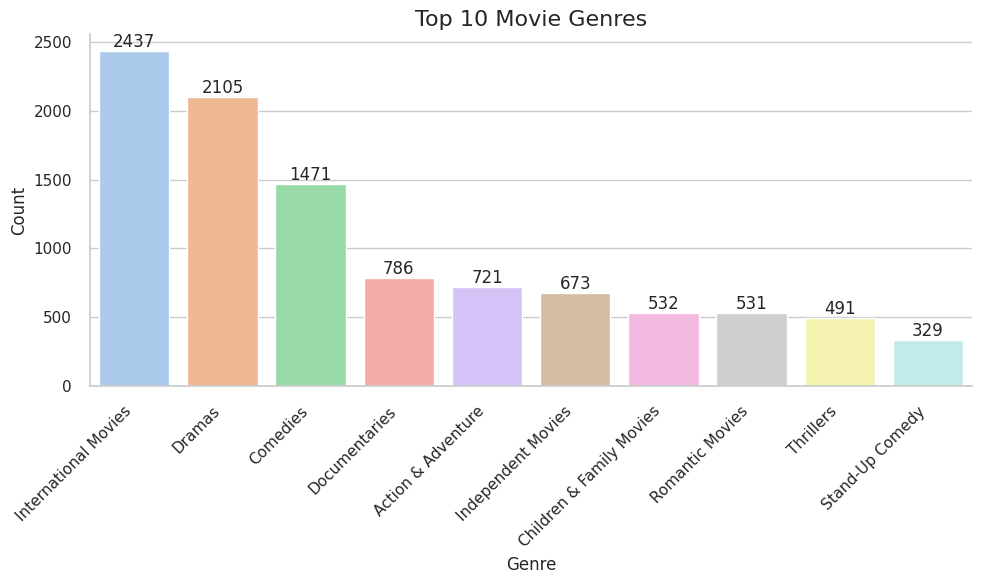

In [40]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size

# Customize the colors
colors = sns.color_palette("pastel")  # Use a pastel color palette
ax = sns.barplot(x='genre', y='count', data=movie_genres.head(10), palette=colors)
ax.bar_label(ax.containers[0], fontsize=12, label_type='edge')

# Add labels and title
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Top 10 Movie Genres", fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Add a subtle grid for better readability
plt.grid(visible=False, axis='x')

# Remove the top and right spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

--> The majority of the Movie material available on Netflix is comprised of International films, Dramas, Comedies, Documentaries, Action and Adventure films.


## 12 - Leading TV Show Genres

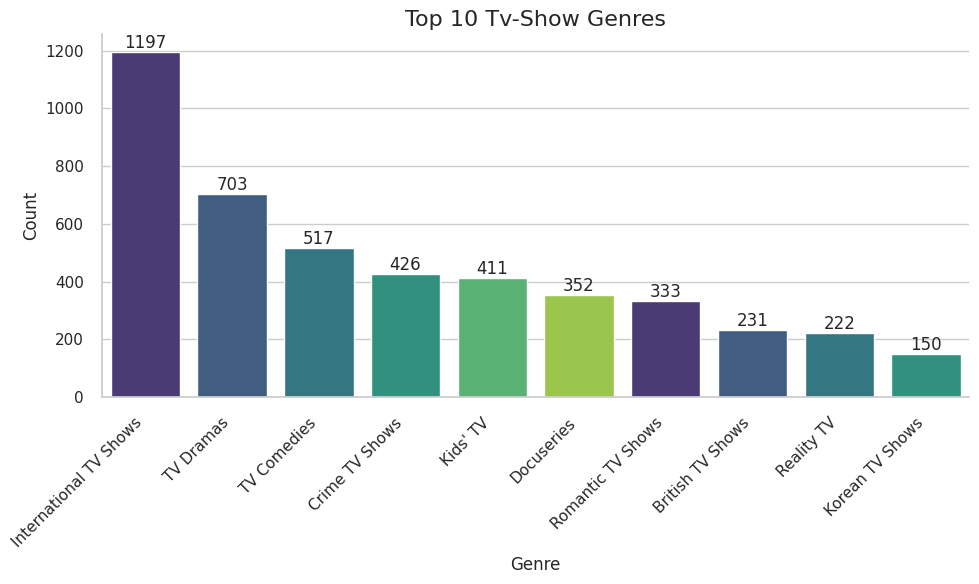

In [41]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size
colors = sns.color_palette("viridis")
ax = sns.barplot(x='genre', y='count', data=tv_genres.head(10), palette=colors)
ax.bar_label(ax.containers[0], fontsize=12, label_type='edge')

# Add labels and title
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Top 10 Tv-Show Genres", fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")
plt.grid(visible=False, axis='x')
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

--> International TV Shows, TV Dramas, and TV Comedies are the top 3 genres on Netflix, followed by Crime TV Shows and Kids TV.

## 13 - Ratings Distribution for TV Programs and Movies

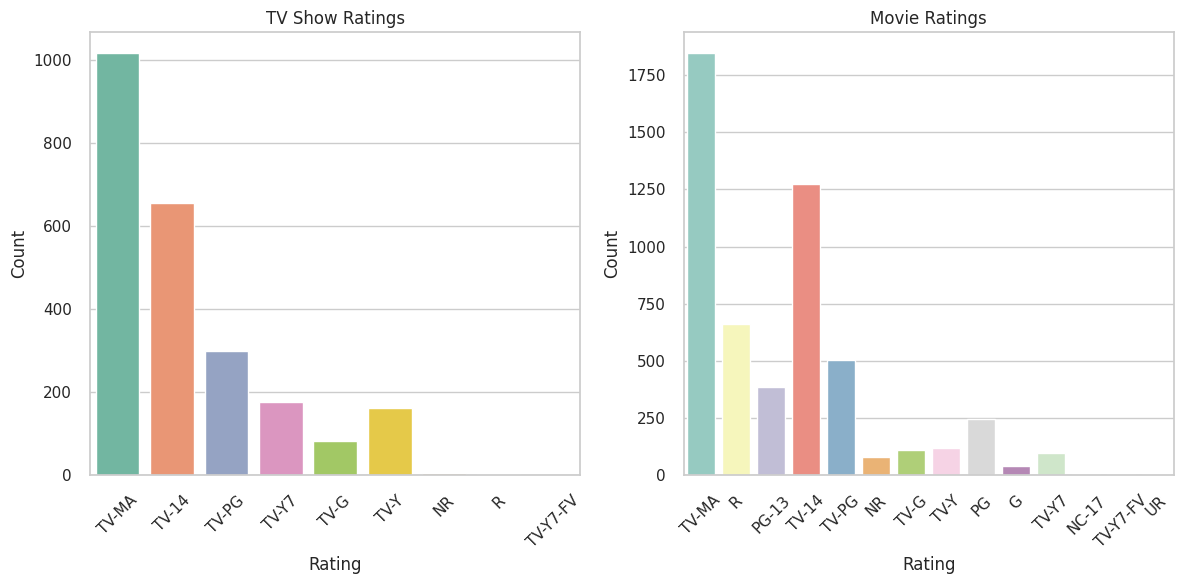

In [42]:
# Set style
sns.set(style="whitegrid")

# Create a figure with two subplots in one row
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Color palettes for the plots
tv_palette = "Set2"  # You can choose a palette you like
movie_palette = "Set3"  # Different from the TV show palette

# First subplot (left)
sns.countplot(x='rating', data=tv_shows, ax=axes[0], palette=tv_palette)
axes[0].set_title('TV Show Ratings')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Second subplot (right)
sns.countplot(x='rating', data=movies_, ax=axes[1], palette=movie_palette)
axes[1].set_title('Movie Ratings')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust layout
plt.tight_layout()
plt.show()

--> We can see that the majority of the content that is made available on Netflix is labeled TV-MA (Mature Audience) and then TV-14 (Not Suitable for Age Under 14).

## 14 - Monthly Content Release Distribution

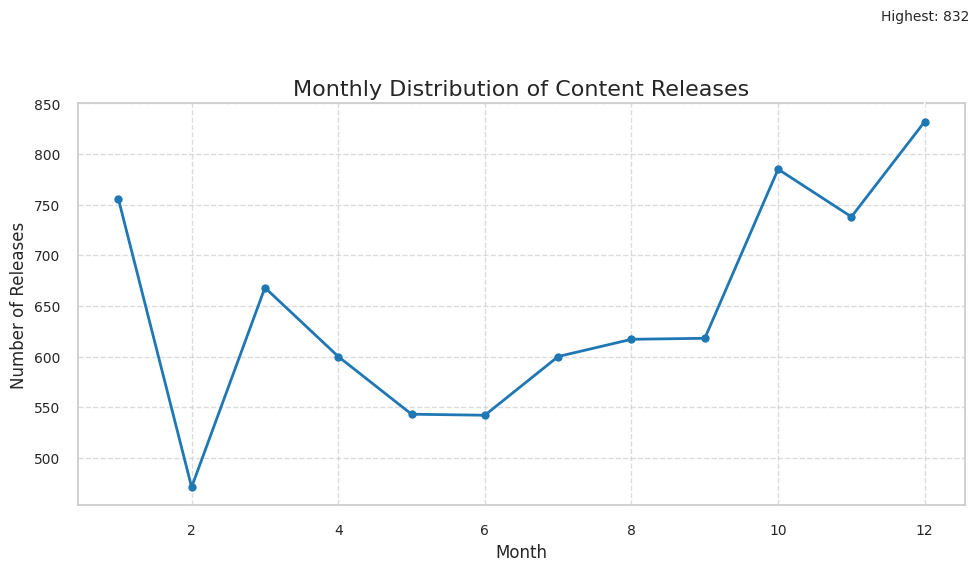

In [43]:
# Set style
sns.set(style="whitegrid")

# Calculate monthly counts
monthly_counts = net_df.groupby('month')['show_id'].count()

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', color='tab:blue', linewidth=2)

# Adding a grid
plt.grid(True, linestyle='--', alpha=0.7)

# Customize the title and labels
plt.title('Monthly Distribution of Content Releases', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Releases', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Annotate the highest point
max_month = monthly_counts.idxmax()
max_count = monthly_counts[max_month]
plt.annotate(f'Highest: {max_count}', xy=(max_month, max_count), xytext=(max_month, max_count + 100),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10, ha='center')

# Show the plot
plt.tight_layout()
plt.show()


--> We can see that the months of October, November, December, and January had the highest stuff release.

## 15 - Investigating Common Words Used in Titles

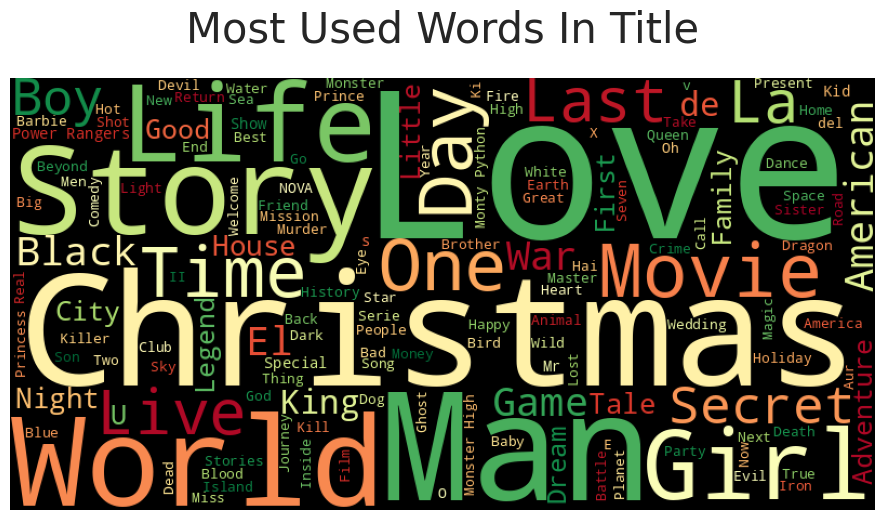

In [44]:
# Extract the 'title' column
titles = net_df['title']

# Combine all titles into a single string
all_titles = ' '.join(titles)

# Define a set of stopwords to exclude from the word cloud
stopwords = set(STOPWORDS)

# Create a WordCloud object with customization options
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    stopwords=stopwords,
    min_font_size=10,
    max_words=1000,
    colormap='RdYlGn_r'
).generate(all_titles)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.title('Most Used Words In Title', fontsize=30, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


--> We can see that words like this one are frequently used in titles, including Christmas, Life, Girl, Love, World, Story, and Man.

## 16 - Examining a Word Cloud of Common Words for Descriptions

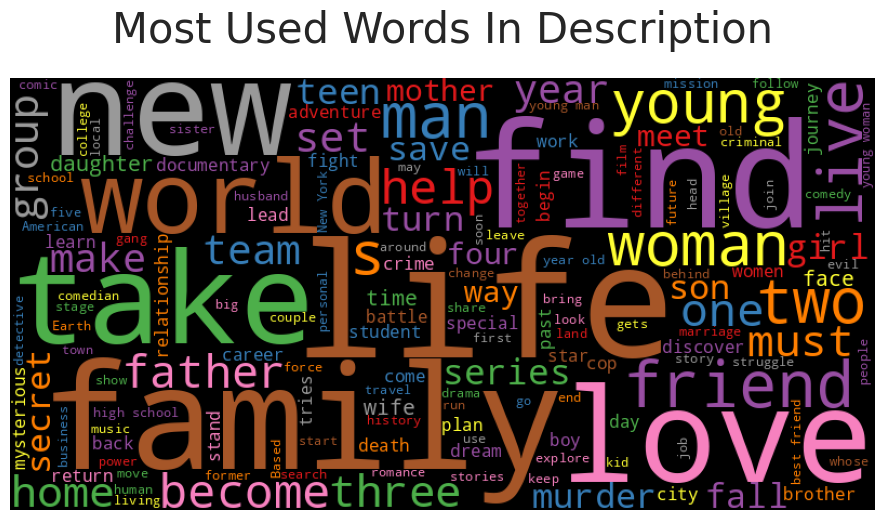

In [45]:
# Combine all descriptions into a single string
all_descriptions = ' '.join(net_df['description'])

# Create a WordCloud object with customization options
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    stopwords=set(STOPWORDS),
    min_font_size=10,
    max_words=1000,
    colormap='Set1_r'
).generate(all_descriptions)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.title('Most Used Words In Description', fontsize=30, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


--> We can observe that words like this one are frequently used in descriptions, along with words like family, friend, love, life, woman, and young.

# Data Preprocessing

### Model Approach
1. Select the attributes based on which you want to cluster the shows
2. Text preprocessing: Remove all non-ascii characters, stopwords and punctuation marks, convert all textual data to lowercase.
3. Lemmatization to generate a meaningful word out of corpus of words
4. Tokenization of corpus
5. Word vectorization
6. Dimensionality reduction
6. Use different algorithms to cluster the movies, obtain the optimal number of clusters using different techniques
7. Build optimal number of clusters and visualize the contents of each cluster using wordclouds.


In [46]:
# Combine multiple columns into a single 'clustering_attributes' column for text-based clustering.
net_df['clustering_attributes'] = (net_df['description'] +
                                   net_df['listed_in']+
                                   net_df['rating'] +
                                   net_df['country'] +
                                   net_df['cast'] +
                                   net_df['director'])
net_df['clustering_attributes'] = net_df['clustering_attributes'].str.lower()

In [47]:
# Access the 'clustering_attributes' value for the first row (index 0) in the DataFrame.
net_df['clustering_attributes'][0]

'in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.international tv shows, tv dramas, tv sci-fi & fantasytv-mabraziljoão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi'

## Removing Non-ASCII characters

In [48]:
# Remove non-ASCII characters from a list of words.
def remove_nonascii(words):
  new_words = []
  for i in words:
    word = unicodedata.normalize('NFKD', i).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    new_words.append(word)
  return new_words

In [49]:
# Apply the remove_nonascii function to the 'clustering_attributes' column in the DataFrame
net_df['clustering_attributes'] = remove_nonascii(net_df['clustering_attributes'])

In [50]:
# Access the 'clustering_attributes' value for the first row (index 0) in the DataFrame.
net_df['clustering_attributes'] [0]

'in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.international tv shows, tv dramas, tv sci-fi & fantasytv-mabraziljoao miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zeze motta, celso frateschi'

## Removing Punctuations

In [51]:
# Remove punctuation characters from a given text.
def remove_punctuation(text):
  translator = str.maketrans('','',string.punctuation)
  return text.translate(translator)

In [52]:
# Apply the remove_punctuation function to the 'clustering_attributes' column in the DataFrame
net_df['clustering_attributes'] = net_df['clustering_attributes'].apply(remove_punctuation)

## Remove the stopwords

In [56]:
# Create a set of stopwords in English using the NLTK library.
stop_words = set(stopwords.words('english'))

In [57]:
# Remove common English stopwords from a given text.
def stopwords(text):
  text = [word.lower() for word in text.split() if word.lower() not in stop_words]
  return " ".join(text)

In [58]:
# Apply the stopwords function to the 'clustering_attributes' column in the DataFrame
net_df['clustering_attributes'] = net_df['clustering_attributes'].apply(stopwords)

In [59]:
# Access the 'clustering_attributes' value for the first row (index 0) in the DataFrame.
net_df['clustering_attributes'][0]

'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalorinternational tv shows tv dramas tv scifi fantasytvmabraziljoao miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zeze motta celso frateschi'

## Lemmatization

In [60]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [61]:
# Apply the lemmatize_verbs function to the 'clustering_attributes' column in the DataFrame
net_df['clustering_attributes'] = lemmatize_verbs(net_df['clustering_attributes'])

In [62]:
# Access the 'clustering_attributes' value for the first row (index 0) in the DataFrame.
net_df['clustering_attributes'][0]

'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalorinternational tv shows tv dramas tv scifi fantasytvmabraziljoao miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zeze motta celso frateschi'

In [63]:
# Convert the 'clustering_attributes' column to the string data type
net_df['clustering_attributes'] = net_df['clustering_attributes'].astype(str)

In [64]:
# Assign the 'clustering_attributes' column from the DataFrame to the variable 'word'
word = net_df['clustering_attributes']

## Create Clusters

### Tokenization

In [65]:
# Initialize a tokenizer using the TweetTokenizer class
tokenizer = TweetTokenizer()

In [66]:
# Apply the tokenizer to tokenize the text in the 'clustering_attributes' column.
net_df['clustering_attributes'] = net_df['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))

In [67]:
# Accessing the 'clustering_attributes' column from the DataFrame
net_df['clustering_attributes']

0       [future, elite, inhabit, island, paradise, far...
1       [devastating, earthquake, hits, mexico, city, ...
2       [army, recruit, found, dead, fellow, soldiers,...
3       [postapocalyptic, world, ragdoll, robots, hide...
4       [brilliant, group, students, become, cardcount...
                              ...                        
7782    [lebanons, civil, war, deprives, zozo, family,...
7783    [scrappy, poor, boy, worms, way, tycoons, dysf...
7784    [documentary, south, african, rapper, nasty, c...
7785    [dessert, wizard, adriano, zumbo, looks, next,...
7786    [documentary, delves, mystique, behind, bluesr...
Name: clustering_attributes, Length: 7770, dtype: object

### Vectorization

In [68]:
# Join a list of words into a single space-separated string.
def join_words(x):
  return " ".join(x)

In [69]:
# Apply the join_words function to concatenate the tokenized words in the 'clustering_attributes' column
net_df['clustering_attributes'] = net_df['clustering_attributes'].apply(join_words)

In [70]:
# Assign the 'clustering_attributes' column to the variable 'clustering_data'
clustering_data = net_df['clustering_attributes']

In [71]:
# Initialize a TF-IDF vectorizer with specific configuration
tfidf = TfidfVectorizer(max_df = 0.9, max_features = 20000)

# Transform the text data in 'clustering_data' into a TF-IDF matrix 'X'
X = tfidf.fit_transform(clustering_data)

In [72]:
# Check the shape of the TF-IDF matrix 'X'.
X.shape

(7770, 20000)

In [73]:
# Convert the TF-IDF matrix 'X' to a dense NumPy array
X = X.toarray()

## Dimensionality reduction using PCA:

Text(0, 0.5, 'cumulative explained variance')

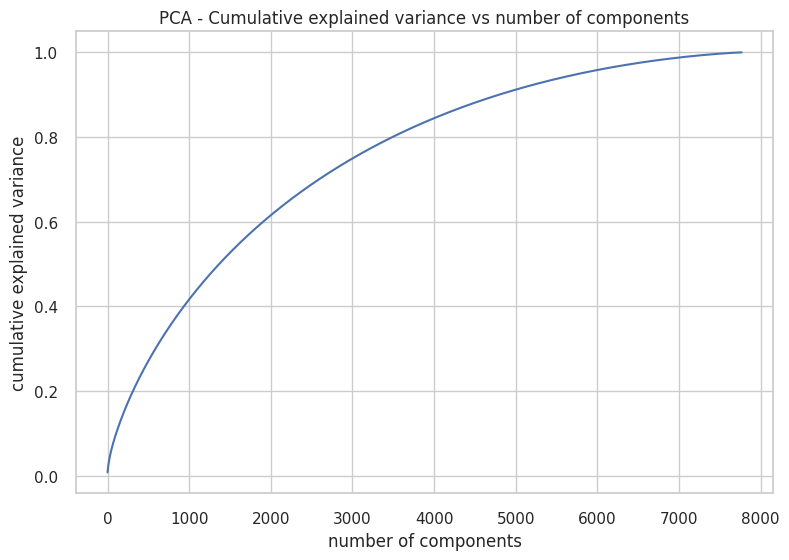

In [74]:
# Initialize PCA (Principal Component Analysis) without specifying the number of components.
pca = PCA()
# Fit PCA to the TF-IDF matrix 'X'.
pca.fit(X)

# Create a cumulative explained variance plot to help determine the optimal number of components.
plt.figure(figsize=(9,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

#### We find that 100% of the variance is explained by about ~7500 components.
#### Also, more than 80% of the variance is explained just by 4000 components.
#### Hence to simplify the model, and reduce dimensionality, we can take the top 4000 components, which will still be able to capture more than 80% of variance.

In [75]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=42)
pca.fit(X)

PCA(n_components=4000, random_state=42)

In [76]:
# transformed features
x_pca = pca.transform(X)

In [77]:
# shape of transformed vectors
x_pca.shape

(7770, 4000)

## Clusters implementation:
### K-Means Clustering:

--> Visualizing the elbow curve and Silhouette score to decide on the optimal number of clusters for K-means clustering algorithm.

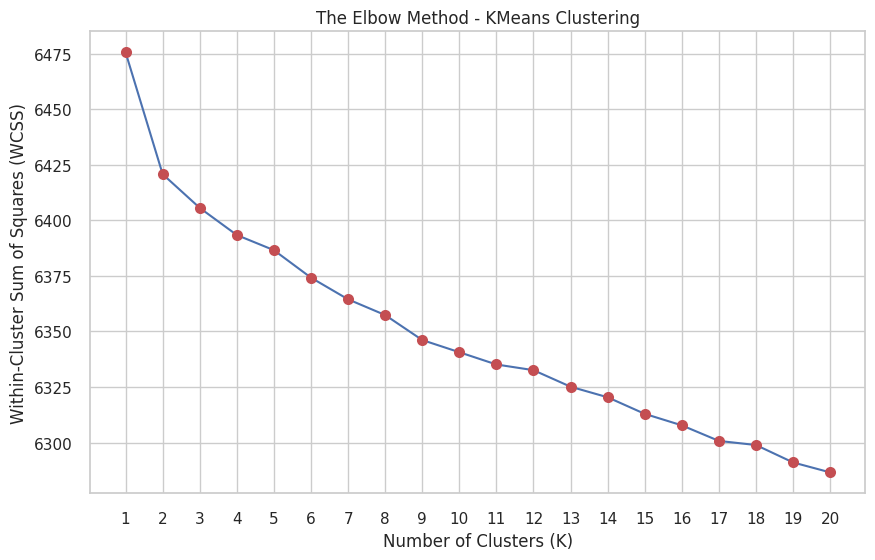

In [78]:
# Initialize a list to store the within-cluster sum of squares (WCSS) for different cluster numbers
wcss = []
number_clusters = range(1, 21)

# Loop through a range of cluster numbers and calculate WCSS for each
for i in number_clusters:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)

     # Fit KMeans to the data and compute the WCSS for the current cluster configuration.
    kmeans.fit(x_pca)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

# Create a plot to visualize the Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(number_clusters, wcss, marker='o', linestyle='-', color='b', markerfacecolor='r', markersize=8)
plt.title('The Elbow Method - KMeans Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.xticks(np.arange(1, 21, step=1))
plt.show()

--> The sum of squared distance between each point and the centroid in a cluster (WCSS) decreases with the increase in the number of clusters.

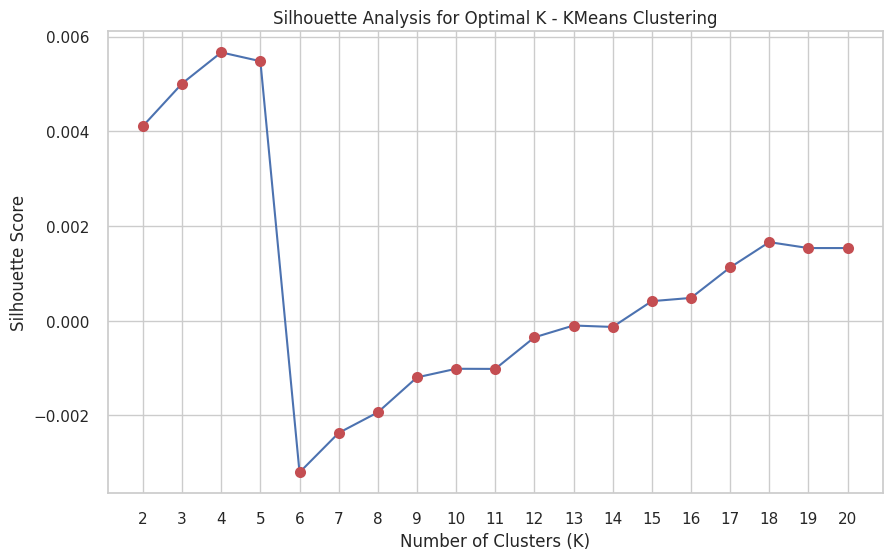

In [79]:
# Plotting Silhouette score for different umber of clusters
range_n_clusters = range(2, 21)
silhouette_avg = []

# Loop through a range of cluster numbers and calculate the Silhouette score for each
for num_clusters in range_n_clusters:
    # Initialize KMeans
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)

     # Fit KMeans to the data and obtain cluster labels
    kmeans.fit(x_pca)
    cluster_labels = kmeans.labels_

    # Calculate silhouette score
    silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

# Create a plot to visualize the Silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg, marker='o', linestyle='-', color='b', markerfacecolor='r', markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal K - KMeans Clustering')
plt.grid(True)
plt.xticks(np.arange(2, 21, step=1))
plt.show()

--> The highest Silhouette score is obtained for 4 clusters.

In [80]:
# Clustering the data into 4 clusters
kmeans = KMeans(n_clusters=4,init='k-means++')
kmeans.fit(x_pca)

KMeans(n_clusters=4)

In [81]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(6392.890605632927, -0.004281744705383037)


In [82]:
# Adding a kmeans cluster number attribute
net_df['kmeans_cluster'] = kmeans.labels_

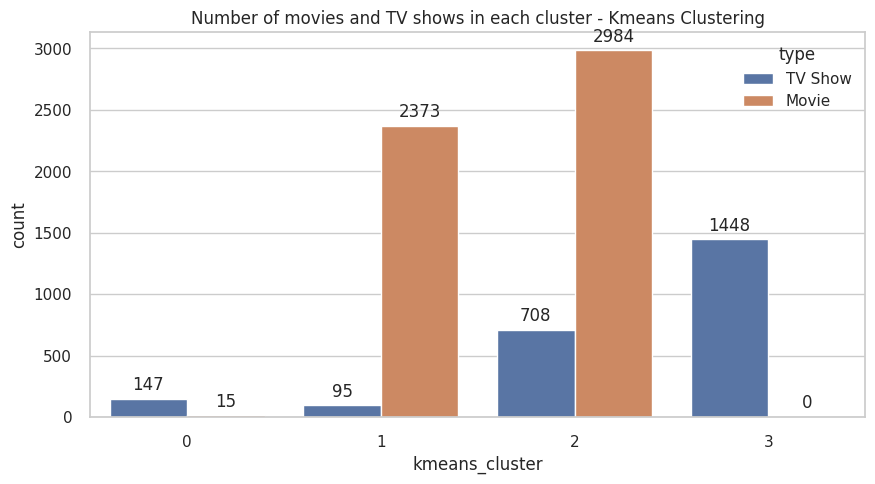

In [83]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=net_df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


In [84]:
# Building a wordcloud for the movie descriptions
def kmeans_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in net_df[net_df['kmeans_cluster']==cluster_num].description.values:

      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()

      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width=800,
    height=400,
    background_color='black',
    stopwords=stopwords,
    min_font_size=10,
    max_words=1000,
    colormap='RdYlGn_r').generate(comment_words)


  # plot the WordCloud image
  plt.figure(figsize = (6,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

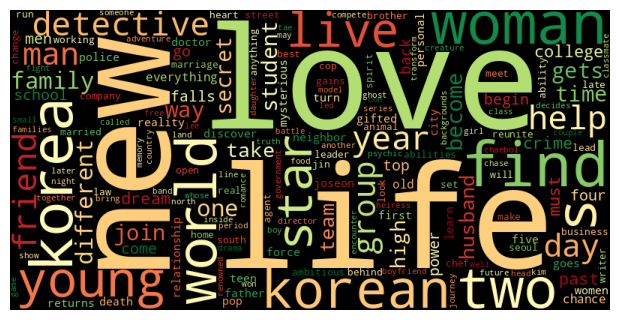

In [85]:
# Wordcloud for cluster 0
kmeans_worldcloud(0)

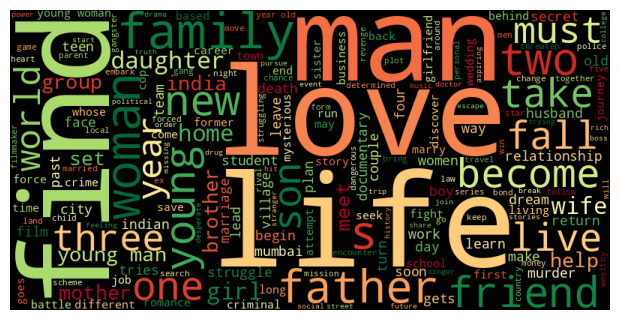

In [86]:
# Wordcloud for cluster 1
kmeans_worldcloud(1)

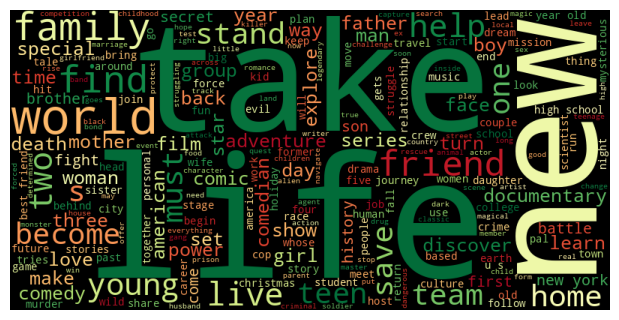

In [87]:
# Wordcloud for cluster 2
kmeans_worldcloud(2)

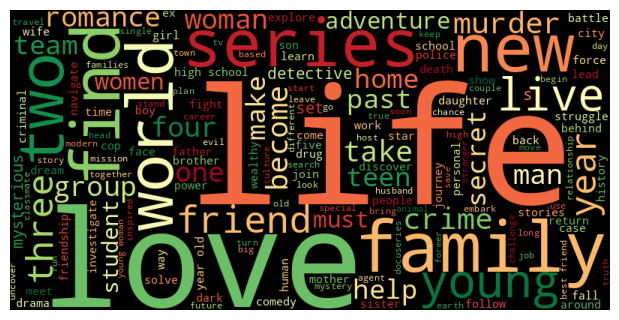

In [88]:
# Wordcloud for cluster 3
kmeans_worldcloud(3)

In [89]:
# Filter rows in the DataFrame where the 'kmeans_cluster' column is equal to 0
cluster_0 = net_df[net_df['kmeans_cluster']== 0][['type','title','director','cast','country','rating','listed_in','description']]

In [90]:
# Display the first few rows of the DataFrame
cluster_0.head()

,type,title,director,cast,country,rating,listed_in,description
51,TV Show,100 Days My Prince,,"Doh Kyung-soo, Nam Ji-hyun, Cho Seong-ha, Cho ...",South Korea,TV-14,"International TV Shows, Romantic TV Shows, TV ...","Upon losing his memory, a crown prince encount..."
61,TV Show,12 Years Promise,,"So-yeon Lee, Namkoong Min, Tae-im Lee, So-hui ...",South Korea,TV-14,"International TV Shows, Korean TV Shows, Roman...",A pregnant teen is forced by her family to lea...
95,TV Show,28 Moons,,"Jin-sung Yang, Kyu-jong Kim, Tae-hwan Kang, Ge...",South Korea,TV-PG,"International TV Shows, Korean TV Shows, Roman...",When her fiancé acts strangely upon receiving ...
191,TV Show,A Korean Odyssey,,"Lee Seung-gi, Cha Seung-won, Oh Yeon-seo, Lee ...",South Korea,TV-MA,"International TV Shows, Korean TV Shows, Roman...",A self-serving mythical creature's bid for inv...
199,TV Show,A Love So Beautiful,,"Kim Yo-han, So Joo-yeon, Yeo Hoi-hyun, Jeong J...",South Korea,TV-PG,"International TV Shows, Romantic TV Shows, TV ...",Love is as tough as it is sweet for a lovestru...


In [91]:
# Get the shape (number of rows and columns) of the DataFrame
cluster_0.shape

(162, 8)

In [92]:
# Filter rows in the DataFrame where the 'kmeans_cluster' column is equal to 1
cluster_1 = net_df[net_df['kmeans_cluster']== 1][['type','title','director','cast','country','rating','listed_in','description']]

In [93]:
# Display the first few rows of the DataFrame
cluster_1.head()

,type,title,director,cast,country,rating,listed_in,description
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
6,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,TV-MA,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
8,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,TV-14,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,TV-MA,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [94]:
# Get the shape (number of rows and columns) of the DataFrame
cluster_1.shape

(2468, 8)

In [95]:
# Filter rows in the DataFrame where the 'kmeans_cluster' column is equal to 2
cluster_2 = net_df[net_df['kmeans_cluster']== 2][['type','title','director','cast','country','rating','listed_in','description']]

In [96]:
# Display the first few rows of the DataFrame
cluster_2.head()

,type,title,director,cast,country,rating,listed_in,description
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,PG-13,Dramas,A brilliant group of students become card-coun...
7,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,R,Dramas,After one of his high school students attacks ...
10,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,TV-MA,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...
14,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,R,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...


In [97]:
# Get the shape (number of rows and columns) of the DataFrame
cluster_2.shape

(3692, 8)

In [98]:
# Filter rows in the DataFrame where the 'kmeans_cluster' column is equal to 3
cluster_3 = net_df[net_df['kmeans_cluster']== 3][['type','title','director','cast','country','rating','listed_in','description']]

In [99]:
# Display the first few rows of the DataFrame
cluster_3.head()

,type,title,director,cast,country,rating,listed_in,description
0,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,TV Show,1983,,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",TV-MA,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,TV Show,1994,Diego Enrique Osorno,,Mexico,TV-MA,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,TV Show,Feb-09,,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",United States,TV-14,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


In [100]:
# Get the shape (number of rows and columns) of the DataFrame
cluster_3.shape

(1448, 8)

## Hierarchical clustering.(Dendogram)

--> Visualizing the dendrogram to decide on the optimal number of clusters for the agglomerative (hierarchical) clustering algorithm

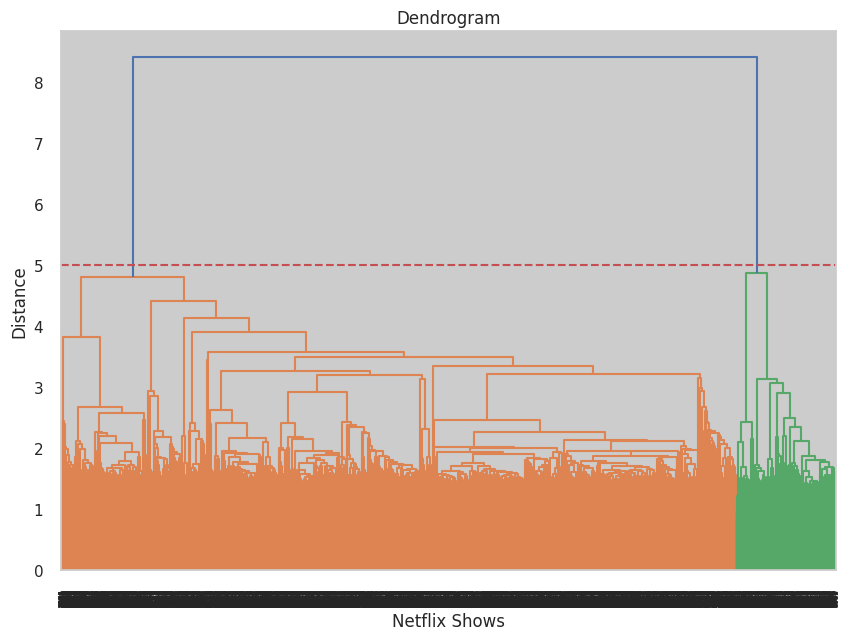

In [101]:
# Using the dendogram to find the optimal number of clusters
plt.figure(figsize=(10, 7))
dend = sch.dendrogram(sch.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 5.0, color='r', linestyle='--')

## Agglomerative Hierarchical Clustering

In [102]:
# Model 2 implementation
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')

# predict on the model
y_hc = hc.fit_predict(x_pca)

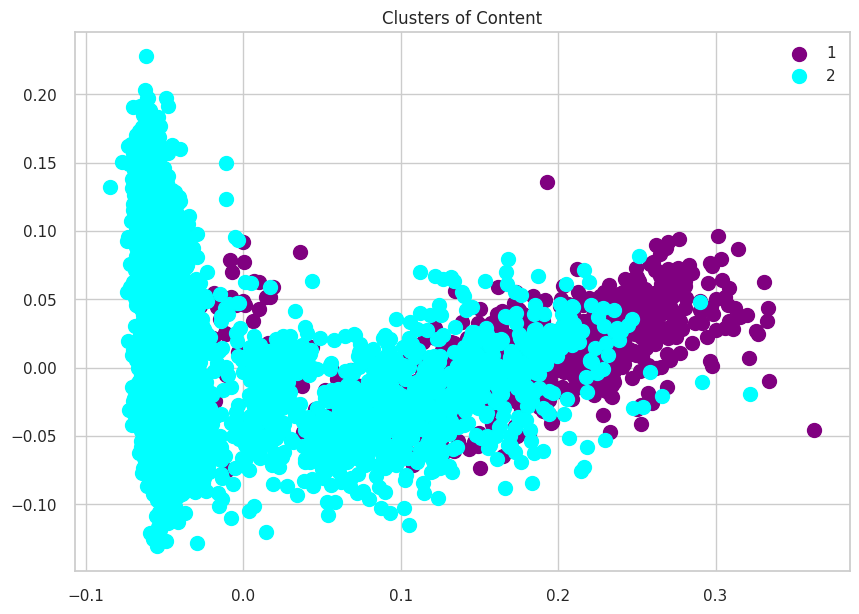

In [103]:
# Create a new figure with a size of 14 by 10
plt.figure(figsize=(10, 7))

# Define new cluster colors and labels
cluster_colors = ['purple', 'cyan', ]
cluster_labels = ['1', '2', ]

# Plot data points for each cluster using a loop for cleaner code
for i in range(2):
    cluster_x = x_pca[y_hc == i, 0]
    cluster_y = x_pca[y_hc == i, 1]
    plt.scatter(cluster_x, cluster_y, s=100, c=cluster_colors[i], label=cluster_labels[i])

# Add a title to the plot
plt.title('Clusters of Content')

# Add a legend to the plot indicating which label corresponds to each cluster
plt.legend()

# Display the plot
plt.show()

# Content based Recommendation System

In [104]:
# Create the TF-IDF vectorizer object
vectorizer = TfidfVectorizer()

# Fit and transform the 'description' column into a TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(net_df['description'])

# Get the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame to display the TF-IDF scores of the first document
df = pd.DataFrame(tfidf_matrix[0].T.todense(), index=feature_names, columns=["TF-IDF Score"])

In [105]:
# Create a pipeline with two steps: CountVectorizer and TfidfTransformer, with stop_words set to 'english'
pipe = Pipeline([
    ('cv', CountVectorizer(stop_words='english')),
    ('tfid', TfidfTransformer())
]).fit(net_df['description'])

# Use the 'cv' step of the pipeline to transform the 'description' column of the 'net_df' DataFrame into a matrix of term frequencies
cv_matrix = pipe['cv'].transform(net_df['description']).toarray()

# Use the 'tfid' step of the pipeline to compute the inverse document frequencies for each term
tfidf_matrix = pipe['tfid'].idf_

# Calculate and display the IDF weights for each term
idf_weights_df = pd.DataFrame(tfidf_matrix, index=pipe['cv'].get_feature_names_out(), columns=['idf_weights'])
print("\nIDF Weights:")
print(idf_weights_df)



IDF Weights:
        idf_weights
000        6.402806
007        8.348716
009        9.265007
10         6.244582
100        7.250104
...             ...
ömer       9.265007
über       8.859542
łukasz     9.265007
ōarai      9.265007
şeref      9.265007

[17888 rows x 1 columns]


In [106]:
# Create a TfidfVectorizer object to transform the text data into a numerical representation
vectorizer = TfidfVectorizer()

# Fit and transform the text data using the vectorizer
tfidf_matrix = vectorizer.fit_transform(net_df['title'])

# Compute the cosine similarity matrix between the tfidf matrix
cosine_sim = cosine_similarity(tfidf_matrix)

# Get the list of program titles
program_list = net_df['title'].tolist()


In [107]:
def recommend_programs(title, cosine_similarity=cosine_sim, top_n=10):
    # Get the index of the program title in the program list
    index = program_list.index(title)

    # Compute the cosine similarity scores between the program and all other programs
    sim_scores = list(enumerate(cosine_similarity[index]))

    # Sort the similarity scores in descending order and exclude the first one (which is the program itself)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n + 1]

    # Get the indices of the top N most similar programs
    recommend_indices = [i[0] for i in sim_scores]

    # Get the titles and similarity scores of the top N most similar programs
    recommend_programs = net_df['title'].iloc[recommend_indices]
    recommend_scores = [round(score, 4) for _, score in sim_scores]

    # Create a pandas DataFrame to display the recommended programs and their similarity scores
    rec_table = pd.DataFrame({'Recommend Program': recommend_programs, 'Similarity Score': recommend_scores})

    # Return the DataFrame
    return rec_table

In [108]:
#Checking Recommendation  system working correctly or not.
recommend_programs('Avengers: Infinity War')

,Recommend Program,Similarity Score
7475,War,0.4518
3400,King’s War,0.3224
3588,LEGO Marvel Super Heroes: Avengers Reassembled!,0.2897
3761,Love Is War,0.2890
2453,God of War,0.2866
7479,War Machine,0.2812
7478,War Horse,0.2774
6873,The Silent War,0.2736
6094,The Art of War,0.2714
2405,Ghosts of War,0.2629


# **Conclusion**


--> Our dataset contain 7787 rows and 12 columns.There was'nt any duplicates in dataset,
and maximum number of null value was present in director column followed by cast.

--> Most of the content on Netflix is from Movies(~69%) and only 31% tv shows.

--> Raul Campos, jan suter was most famous director among all

--> Anupam Kher is most popular actor on Netflix.

--> Most of the content released on Netflix by the end of current year and starting of new year.

--> International Movies and Dramas are topmost Genres on Netflix.

--> Most of the content on Netflix is TV-MA(Mature Audience) rated.

--> United states has the highest number of content on the netflix ,followed by India.

--> Most of the movies have duration of 90mimutes.

--> In title column we got 'Love','Man','World','Story','Life' seems very common word.

--> We have implemented 4 clustering model to divide the dataset in clusters.

--> K-means clustering shows that '4' will be optimum no of clusters with the silhoutte score of 0.0057.

--> We have built cosine based  recommender system  using cosine_similarity, which was wroking nicely.
